In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
PATH = 'batik/'
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [3]:
# Reading images from folder

images = []
classes = []
labels = {}

for i, classdir in enumerate(os.listdir(PATH)):
    for filename in os.listdir(os.path.join(PATH, classdir)):
        image = load_img(os.path.join(PATH, classdir, filename), target_size=(IMG_WIDTH, IMG_HEIGHT), color_mode='rgb')
        image = img_to_array(image)
        
        images.append(image)
        classes.append(i)
        
    labels[i] = classdir
    print(f"{classdir}")

batik-celup
batik-megamendung
batik-parang


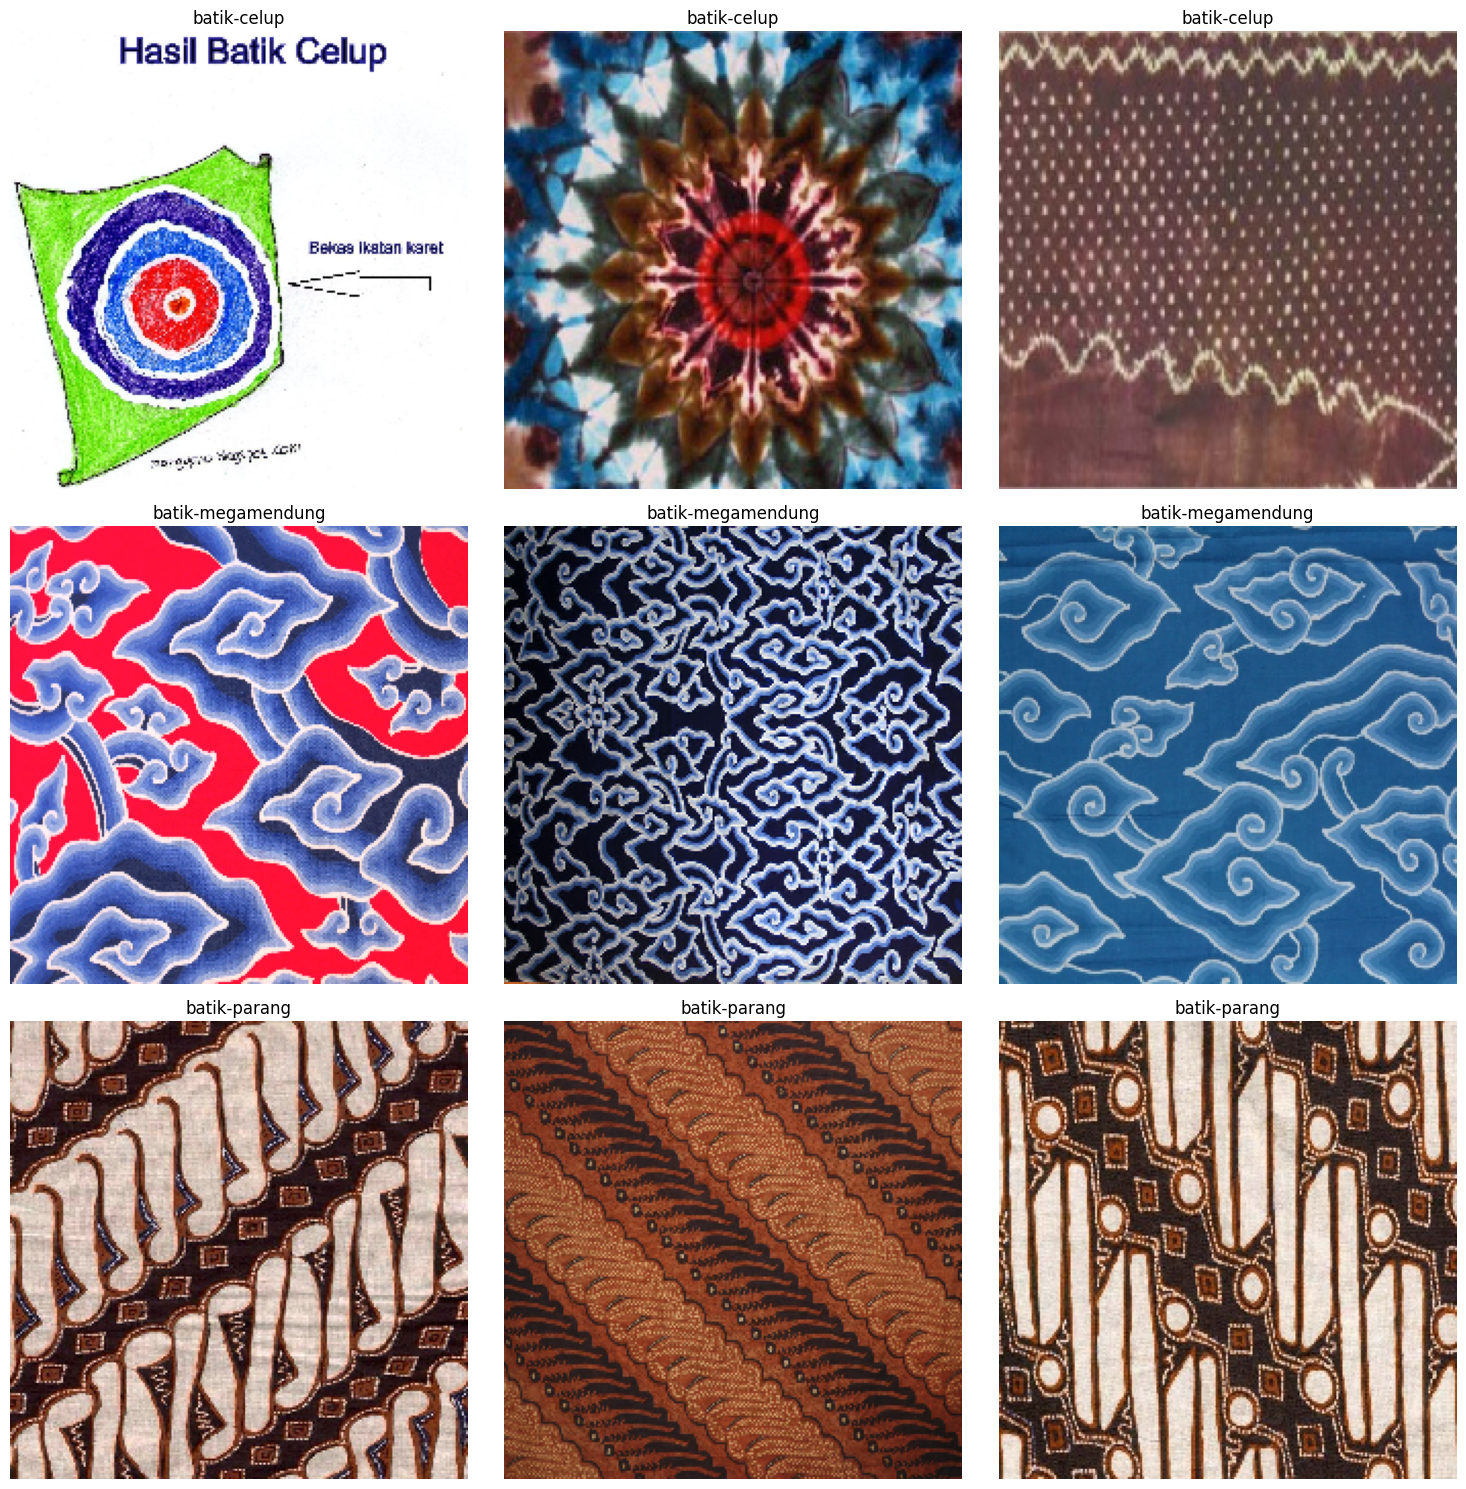

In [4]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Create a figure
plt.figure(figsize=(15, 5*len(labels)))  # Adjust size based on number of classes

# For each class
for class_idx in labels:
    # Get indices of all images in this class
    class_indices = [i for i, x in enumerate(classes) if x == class_idx]
    
    # Randomly select 3 images (or all if less than 3)
    sample_indices = random.sample(class_indices, min(3, len(class_indices)))
    
    # Plot each sample
    for i, idx in enumerate(sample_indices):
        plt.subplot(len(labels), 3, class_idx * 3 + i + 1)
        plt.imshow(images[idx].astype(np.uint8))
        plt.title(f'{labels[class_idx]}')
        plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Scaling the images to 0-1

x = np.array(images).astype('float32') / 255
y = tf.keras.utils.to_categorical(classes, num_classes=len(labels))

In [6]:
x[1]

array([[[0.05098039, 0.27058825, 0.47058824],
        [0.04705882, 0.26666668, 0.46666667],
        [0.03529412, 0.24313726, 0.44705883],
        ...,
        [0.03529412, 0.23137255, 0.4392157 ],
        [0.04313726, 0.27058825, 0.46666667],
        [0.04313726, 0.27058825, 0.46666667]],

       [[0.04313726, 0.2627451 , 0.4627451 ],
        [0.03137255, 0.23921569, 0.44313726],
        [0.04313726, 0.24313726, 0.4509804 ],
        ...,
        [0.04313726, 0.24313726, 0.4509804 ],
        [0.01176471, 0.23137255, 0.43137255],
        [0.04705882, 0.27450982, 0.47058824]],

       [[0.03921569, 0.26666668, 0.4627451 ],
        [0.02745098, 0.23529412, 0.4392157 ],
        [0.05098039, 0.24705882, 0.45490196],
        ...,
        [0.03529412, 0.25490198, 0.45490196],
        [0.00784314, 0.21568628, 0.41960785],
        [0.03529412, 0.27058825, 0.46666667]],

       ...,

       [[0.03921569, 0.25490198, 0.46666667],
        [0.03137255, 0.23137255, 0.44705883],
        [0.04705882, 0

In [7]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.7, random_state=123, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=123, stratify=y_temp)

print(f"X_train size: {len(x_train)}")
print(f"X_test size: {len(x_test)}")
print(f"X_val size: {len(x_val)}")
print(f"y_train size: {len(y_train)}")
print(f"y_test size: {len(y_test)}")
print(f"y_val size: {len(y_val)}")

X_train size: 102
X_test size: 22
X_val size: 22
y_train size: 102
y_test size: 22
y_val size: 22


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,           
    horizontal_flip=True,  
    fill_mode='nearest',
)

val_data_generator = ImageDataGenerator()

train_generator = train_data_generator.flow(x_train, y_train, batch_size=32)
val_generator = val_data_generator.flow(x_val, y_val, batch_size=32)

In [9]:
num_images = len(x_train)
batch_size = 32

augmented_images_count = num_images * batch_size
print(f"Number of images in augmented dataset: {augmented_images_count}")


Number of images in augmented dataset: 3264


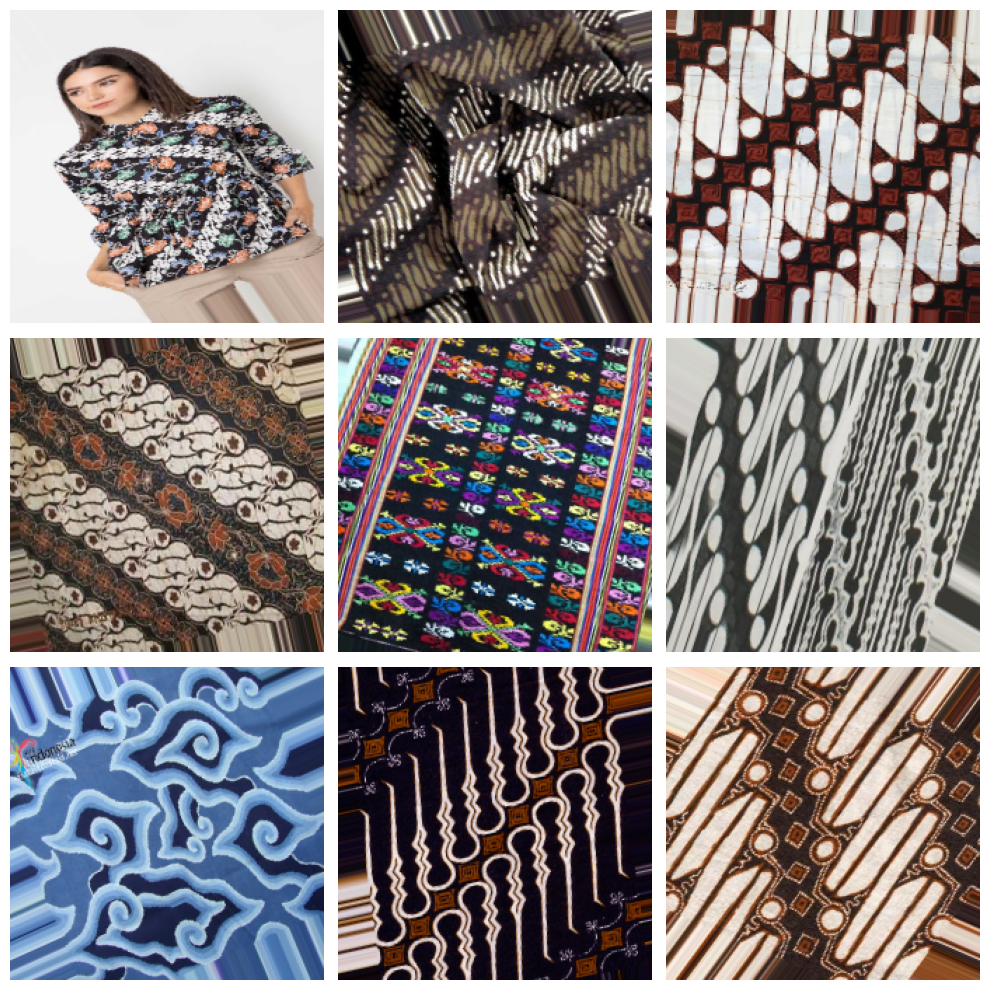

In [11]:
augmented_images, augmented_labels = next(train_generator)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(augmented_images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()

# mobilenet 128, 64, 32 dropout

In [73]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 200704)            0         
                                                                 
 dense_20 (Dense)            (None, 128)             

In [74]:
epochs = 200
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator, validation_data=val_generator, epochs=epochs, callbacks=[early_stopping])

Epoch 1/200
4/4 [==============================] - 2s 457ms/step - loss: 2.2507 - accuracy: 0.2549 - val_loss: 2.2661 - val_accuracy: 0.3182
Epoch 2/200
4/4 [==============================] - 2s 394ms/step - loss: 1.9543 - accuracy: 0.3039 - val_loss: 1.1288 - val_accuracy: 0.3182
Epoch 3/200
4/4 [==============================] - 2s 536ms/step - loss: 1.4711 - accuracy: 0.3235 - val_loss: 1.2900 - val_accuracy: 0.3636
Epoch 4/200
4/4 [==============================] - 2s 543ms/step - loss: 1.2733 - accuracy: 0.4118 - val_loss: 0.9891 - val_accuracy: 0.5455
Epoch 5/200
4/4 [==============================] - 2s 404ms/step - loss: 1.0537 - accuracy: 0.3922 - val_loss: 1.0191 - val_accuracy: 0.5000
Epoch 6/200
4/4 [==============================] - 2s 422ms/step - loss: 0.9529 - accuracy: 0.4804 - val_loss: 0.9818 - val_accuracy: 0.5455
Epoch 7/200
4/4 [==============================] - 2s 392ms/step - loss: 0.9925 - accuracy: 0.5490 - val_loss: 0.9735 - val_accuracy: 0.6364
Epoch 8/200
4

In [79]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Testing Loss: {loss}")
print(f"Testing Accuracy: {accuracy}")

1/1 [==============================] - 0s 85ms/step - loss: 0.6350 - accuracy: 0.8182
Testing Loss: 0.6349921226501465
Testing Accuracy: 0.8181818127632141


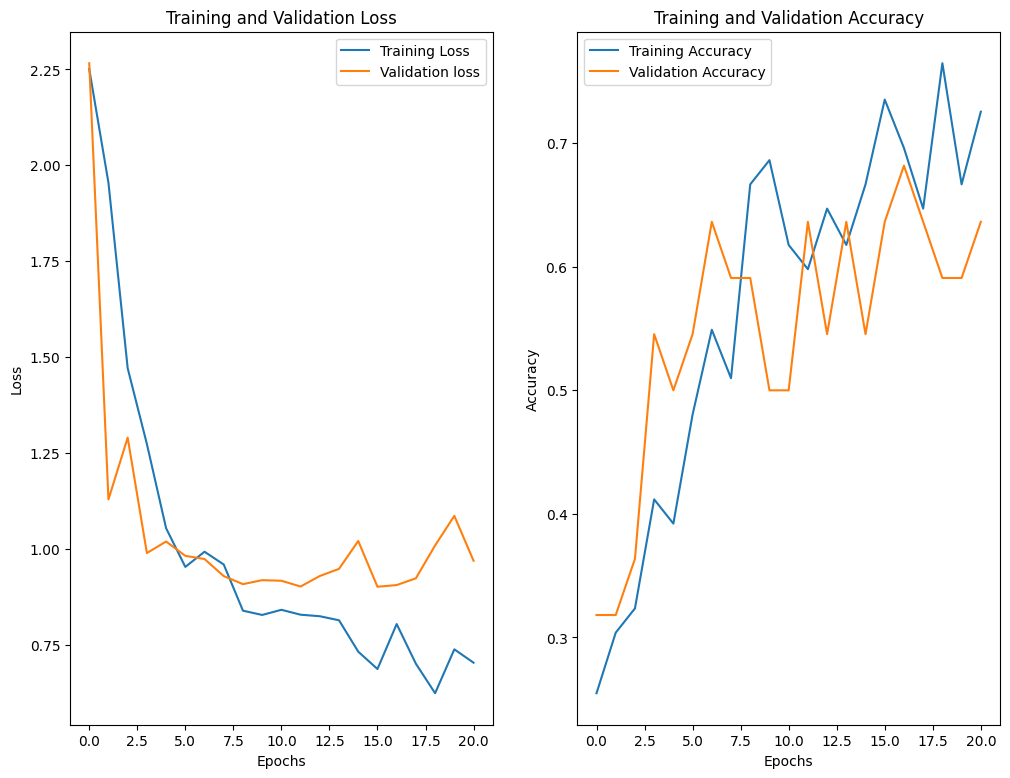

In [80]:
# plot
plt.figure(figsize=(12, 9))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()

In [81]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=["bali", "betawi", "parang"]))


1/1 [==============================] - 0s 79ms/step
Classification Report:
              precision    recall  f1-score   support

        bali       0.83      0.62      0.71         8
      betawi       0.86      0.86      0.86         7
      parang       0.78      1.00      0.88         7

    accuracy                           0.82        22
   macro avg       0.82      0.83      0.82        22
weighted avg       0.82      0.82      0.81        22



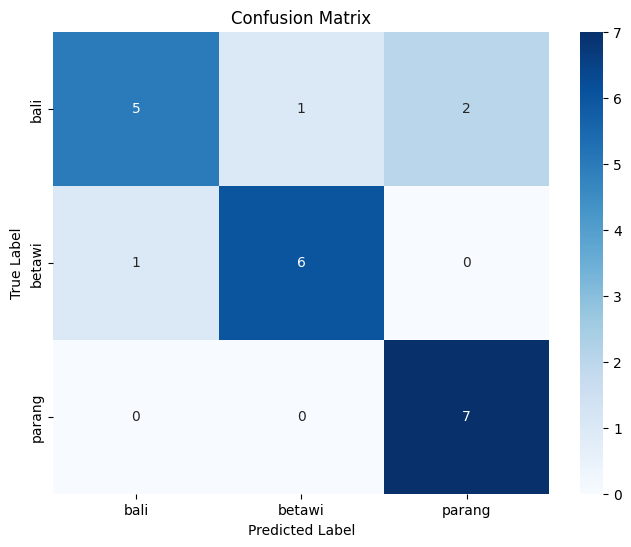

In [82]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["bali", "betawi", "parang"], 
            yticklabels=["bali", "betawi", "parang"])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()